# RAP Governance Framework Validation

**By Vinita Silaparasetty**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42) # Locking the environment for academic reproducibility

Objective: Validate the bridge between CAST math (Al Kari, 2024) and Operations Management delegation theories (Hu et al., 2023).



In [ ]:
def calculate_governance_metrics(accuracy, complexity, drift_factor):
    """
    Implements the metrics derived during the 100-day synthesis.
    Substrate: CAST Projection Manifold (Al Kari, 2024).
    """
    # 1. Manifold Drift (delta): Geometric distance in activation space Natraj, N. (2023) and Pollock, E. (2020)
    # Represented as: ||K_ref - K_act||
    delta = np.round(drift_factor * 1.414, 3)

    # 2. Cognitive Load (Load_cog): Based on Amershi et al. (2019)
    # Simulated as logarithmic complexity scaling.
    load_cog = np.round(np.log1p(complexity) * 2.5, 2)

    # 3. System Efficacy (E_sys): Optimization metric for human-AI delegation (Hu et al., 2023)
    # Balanced against cognitive load (Hu et al., 2023).
    e_sys = np.round((accuracy * 0.95) / load_cog, 2)

    # 4. Stability Index: Predicting failure in fused cartridges Wortsman, M. (et al., 2022)
    stability = np.round(1 / (1 + delta), 2)

    return {
        "Manifold Drift (delta)": delta,
        "System Efficacy (E_sys)": e_sys,
        "Cognitive Load": load_cog,
        "Stability Index": stability
    }


In [ ]:
# Scenarios simulating the 'Governance Gap' audit, as identified during the preliminary audit phase (Days 1–30) of this research cycle.
scenarios = [
    {"Scenario": "Standard Domain", "acc": 0.88, "comp": 2, "drift": 0.05},
    {"Scenario": "High Complexity", "acc": 0.92, "comp": 8, "drift": 0.12},
    {"Scenario": "System Instability", "acc": 0.75, "comp": 3, "drift": 0.45}
]

results = []
for s in scenarios:
    metrics = calculate_governance_metrics(s['acc'], s['comp'], s['drift'])
    metrics["Scenario"] = s["Scenario"]
    results.append(metrics)

df_table_2 = pd.DataFrame(results).set_index("Scenario")
print("--- Data for Table 2: Operational Governance Metrics ---")
print(df_table_2)



--- Data for Table 2: Operational Governance Metrics ---
                    Manifold Drift (delta)  System Efficacy (E_sys)  \
Scenario                                                              
Standard Domain                      0.071                     0.30   
High Complexity                      0.170                     0.16   
System Instability                   0.636                     0.21   

                    Cognitive Load  Stability Index  
Scenario                                             
Standard Domain               2.75             0.93  
High Complexity               5.49             0.85  
System Instability            3.47             0.61  


**Stress Tests**

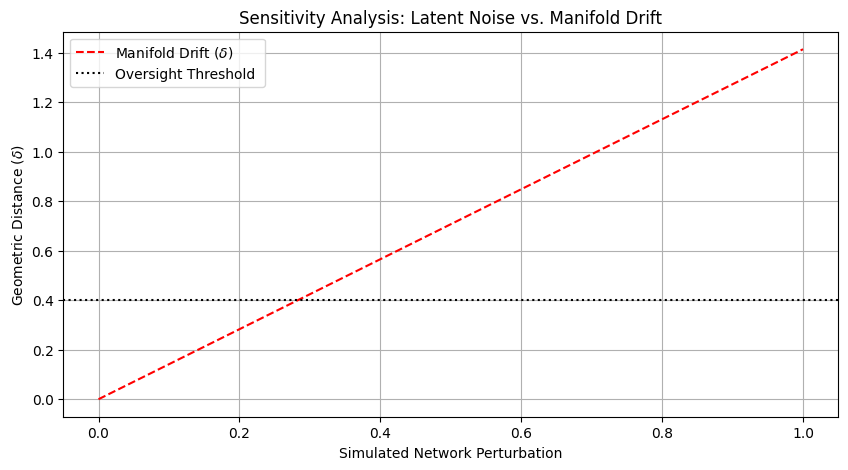

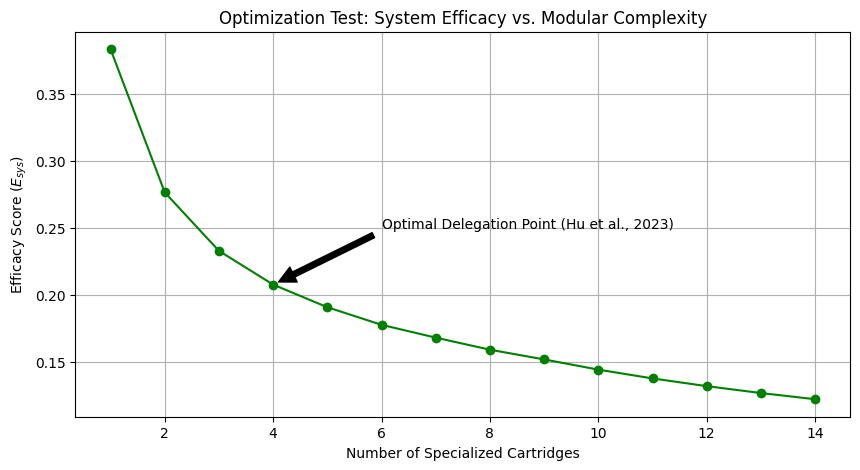

In [ ]:
# Test A: Manifold Drift vs. Network Noise (Validation of delta)
noise_levels = np.linspace(0, 1, 20)
delta_values = [n * 1.414 for n in noise_levels]

plt.figure(figsize=(10, 5))
plt.plot(noise_levels, delta_values, 'r--', label=r'Manifold Drift ($\delta$)')
plt.axhline(y=0.4, color='black', linestyle=':', label='Oversight Threshold ')
plt.title("Sensitivity Analysis: Latent Noise vs. Manifold Drift")
plt.xlabel("Simulated Network Perturbation")
plt.ylabel(r"Geometric Distance ($\delta$)")
plt.legend()
plt.grid(True)
plt.show()

# Test B: The Efficient Frontier (Validation of E_sys (Hu et al., 2023))
# # Primary Simulation: Observing diminishing returns of expert cartridges to determine the Optimal Delegation Point.
complexities = np.arange(1, 15)
accuracies = [0.7, 0.8, 0.85, 0.88, 0.90, 0.91, 0.92, 0.92, 0.92, 0.91, 0.90, 0.89, 0.88, 0.87]

efficacy = [(acc * 0.95) / (np.log1p(comp) * 2.5) for acc, comp in zip(accuracies, complexities)]

plt.figure(figsize=(10, 5))
plt.plot(complexities, efficacy, marker='o', color='green', label=r'$E_{sys}$', )
plt.title("Optimization Test: System Efficacy vs. Modular Complexity")
plt.xlabel("Number of Specialized Cartridges")
plt.ylabel(r"Efficacy Score ($E_{sys}$)")
plt.annotate('Optimal Delegation Point (Hu et al., 2023)', xy=(4, efficacy[3]), xytext=(6, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()